## Exploratory Data Analysis

### Importing essential libraries:

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Reading the cleaned data:

In [39]:
df = pd.read_csv('cleaned_hepatitis.csv')
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,False,live
3,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.576271,200.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.000000,28.0,4.0,False,live


### Converting 'class' to boolean for better visualization of the data:

In [40]:
df['class'] = df['class'].replace('live', 1)
df['class'] = df['class'].replace('die', 0)

In [41]:
df['class'] = df['class'].astype(bool)

In [42]:
df.head(25)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.000000,85.000000,18.000000,4.000000,False,True
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.900000,135.000000,42.000000,3.500000,False,True
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.700000,96.000000,32.000000,4.000000,False,True
3,34,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.576271,200.000000,4.000000,False,True
4,34,female,True,False,False,False,False,True,False,False,False,False,False,0.900000,95.000000,28.000000,4.000000,False,True
5,51,female,False,False,True,False,True,True,False,True,True,False,False,1.405797,105.576271,83.257143,3.827907,False,False
6,23,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.576271,83.257143,3.827907,False,True
7,39,female,True,False,True,False,False,True,True,False,False,False,False,0.700000,105.576271,48.000000,4.400000,False,True
8,30,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.576271,120.000000,3.900000,False,True
9,39,female,False,True,False,False,False,False,True,False,False,False,False,1.300000,78.000000,30.000000,4.400000,False,True


### Checking correlations between variables:

In [43]:
df[['class','age','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','histology']].corr()

,class,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology
class,1.000000,-0.153720,0.074378,0.115601,-0.282064,-0.322814,-0.155180,-0.082624,-0.057822,-0.210914,-0.484684,-0.408728,-0.479193,-0.133866,-0.034217,0.455932,-0.325863
age,-0.153720,1.000000,-0.035650,0.039456,0.230921,0.024020,-0.127871,-0.107504,0.119937,0.069194,0.084106,0.050427,0.140584,-0.035100,-0.003508,-0.214316,0.197211
steroid,0.074378,-0.035650,1.000000,-0.075987,-0.145911,-0.236401,-0.108846,0.223121,-0.093253,-0.056391,0.049541,0.068629,-0.051418,-0.010601,-0.016984,0.175406,-0.080329
antivirals,0.115601,0.039456,-0.075987,1.000000,-0.036074,0.009982,-0.033057,-0.047713,0.088293,-0.169838,-0.162129,-0.167500,-0.174610,-0.185319,-0.102335,0.163818,-0.200227
fatigue,-0.282064,0.230921,-0.145911,-0.036074,1.000000,0.577493,0.373466,-0.108503,0.272423,0.180069,0.271870,0.192245,0.303251,0.122495,0.199377,-0.295089,0.153821
malaise,-0.322814,0.024020,-0.236401,0.009982,0.577493,1.000000,0.610718,-0.056864,0.122847,0.012838,0.336718,0.181162,0.320497,0.186581,0.183337,-0.295582,0.147228
anorexia,-0.155180,-0.127871,-0.108846,-0.033057,0.373466,0.610718,1.000000,-0.086886,0.061763,0.056273,0.189854,0.174525,0.345425,0.172242,0.172978,-0.170659,0.075028
liver_big,-0.082624,-0.107504,0.223121,-0.047713,-0.108503,-0.056864,-0.086886,1.000000,-0.465527,-0.096217,0.113513,0.064968,0.000610,-0.125748,0.042272,-0.052706,-0.071027
liver_firm,-0.057822,0.119937,-0.093253,0.088293,0.272423,0.122847,0.061763,-0.465527,1.000000,0.185218,0.035875,0.188302,0.057229,0.336697,0.135045,-0.201527,0.183089
spleen_palpable,-0.210914,0.069194,-0.056391,-0.169838,0.180069,0.012838,0.056273,-0.096217,0.185218,1.000000,0.035325,0.236776,0.187398,0.252815,0.012966,-0.196341,0.198706


In this correlation table, we can see that 'Class' has high negative correlation with 'Ascites','Varices','Bilirubin'. And it has high positive correlation with 'Albumin'.

### Class vs Bilirubin:

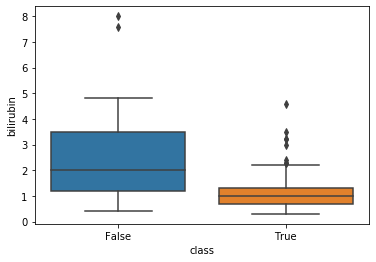

In [44]:
sns.boxplot(x='class',y='bilirubin',data=df)

We can clearly see the negative correlation here. Increase in 'bilirubin' increases the mortality rate.

(False - represents 'die' and True - represents 'live')

### Class vs Albumin:

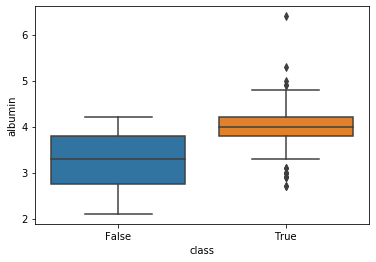

In [45]:
sns.boxplot(x='class',y='albumin',data=df)

We can clearly see the positive correlation here. Increase in 'albumin' decreases the mortality rate.

(False - represents 'die' and True - represents 'live')

### Correlation between 'Ascites' and 'Class':

In [47]:
df[['ascites','class']].corr()

,ascites,class
ascites,1.000000,-0.484684
class,-0.484684,1.000000


We can clearly see the negative correlation here. Increase in 'ascites' increases the mortality rate.

Because more people are alive whose 'ascites' value is negative and viceversa.

### Correlation between 'Ascites' and 'Class':

In [48]:
df[['varices','class']].corr()

,varices,class
varices,1.000000,-0.408728
class,-0.408728,1.000000


We can clearly see the negative correlation here. Increase in 'varices' increases the mortality rate.

Because more people are alive whose 'varices' value is negative and viceversa.

### Conclusion:

1. Increase in 'bilirubin' increases the mortality rate.
2. Increase in 'albumin' decreases the mortality rate.
3. Increase in 'ascites' increases the mortality rate.
4. Increase in 'varices' increases the mortality rate.